## Fibonacci 数列例子

学习计算斐波那契数的代码。通过比较执行时间，说明在动态规划中重用预先计算的部分解是如何提高算法效率的。

### 1. 普通递归算法

In [1]:
#普通递归算法
import time #导入时间模块用于计算程序运行时间

start = time.perf_counter() #start用于记录程序开始运行的时间
#Fibonacci函数
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-2) + fib(n-1)
    
#测试Fibonacci函数
print([fib(n) for n in range(30)])  

end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
t=0.5682004550000013


### 2. 基于备忘录的递归算法

In [2]:
#基于备忘录的递归算法
import time #导入时间模块用于计算程序运行时间

start = time.perf_counter() #start用于记录程序开始运行的时间
past_fib = {}
#Fibonacci函数
def fib(n):
    if n in past_fib:
        return past_fib[n]
    elif n == 0:
        past_fib[n] = 0
        return past_fib[n]
    elif n == 1:
        past_fib[n] = 1
        return past_fib[n]
    else:
        past_fib[n] = fib(n-2) + fib(n-1)
        return past_fib[n]

#测试Fibonacci函数
print([fib(n) for n in range(30)]) 

end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
t=0.0003695780000008142


### 3. 基于备忘录的自底向上迭代法

In [3]:
#基于备忘录的自底向上迭代法
import time #导入时间模块用于计算程序运行时间

start = time.perf_counter() #start用于记录程序开始运行的时间
past_fib = {}
#Fibonacci函数
def fib(n):
    past_fib[0] = 0
    past_fib[1] = 1
    if n in past_fib:
        return past_fib[n]
    else:
        for i in range(2,n+1,1):
            past_fib[i] = past_fib[i-2] + past_fib[i-1]
    return past_fib[n]
    
#测试Fibonacci函数
print([fib(n) for n in range(30)]) 

end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
t=0.0005615530000007141


### 4. 无备忘录的自底向上迭代法

In [4]:
#无备忘录的自底向上迭代法
import time #导入时间模块用于计算程序运行时间

start = time.perf_counter() #start用于记录程序开始运行的时间

#Fibonacci函数
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        f_past = 0
        f_now = 1
        for i in range(2,n+1,1):
            f_future = f_past + f_now
            f_past = f_now
            f_now = f_future
    return f_future
    
#测试Fibonacci函数
print([fib(n) for n in range(30)]) 

end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229]
t=0.0003019960000010258


## Graph例子

研究计算图上所有最短路径的伪代码。构建100个节点的网络，连接密度为30%，连接均匀的概率和任意链路的代价为常数，设为1.0。计算每对最短距离，并画出它们的直方图。

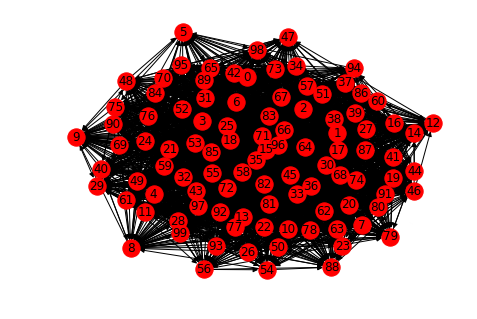

density:  0.3 

path from node7 to node70:  [7, 26, 70]
path from node70 to node7:  [70, 3, 7]
distance:  2.0 2.0
copare with the result using dijkstra_path: 
path from node7 to node70:  [7, 26, 70]
path from node70 to node7:  [70, 3, 7]
distance:  2 2


In [2]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.erdos_renyi_graph(100, 0.3, seed=1, directed=True) # create a directed graph
g = nx.to_numpy_matrix(G)  # to numpy matrix
density = nx.density(G)

# draw the regular graph
nx.draw(G, with_labels = True)
plt.show()
print("density: ", density, "\n")

def allPairsShortestPath(g):
    dist = np.zeros((100, 100))
    pred = np.zeros((100, 100))
    for u in g:
        for v in g: 
            dist[u][v] = sys.maxsize  
            pred[u][v] = None
        dist[u][u] = 0 
        pred[u][u] = None
        for v in g[u]: 
            dist[u][v] = 1 
            pred[u][v] = u

    for mid in g:
        for u in g:
            for v in g:
                newlen = dist[u][mid] + dist[mid][v]
                if newlen < dist[u][v]:
                    dist[u][v] = newlen  
                    pred[u][v] = pred[mid][v]
    return(dist, pred)

def constructShortestPath(s, t, pred):
    path = [t]
    while t != s:
        tmp = pred[s][t]
        t = tmp.astype(int)
        if t is None:
            return None
        path.insert(0,t)
    return path

dist, pred = allPairsShortestPath(G)
path1 = constructShortestPath(7, 70, pred)
path2 = constructShortestPath(70, 7, pred)
print("path from node7 to node70: ", path1)
print("path from node70 to node7: ", path2)
print("distance: ", dist[7][70], dist[70][7])

# using dijkstra_path
path3 = nx.dijkstra_path(G, 7, 70, weight='weight')    #         ————求最短路径
path4 = nx.dijkstra_path(G, 70, 7, weight='weight')
dist1 = nx.dijkstra_path_length(G, 7, 70, weight='weight')
dist2 = nx.dijkstra_path_length(G, 70, 7, weight='weight')
print("copare with the result using dijkstra_path: ")
print("path from node7 to node70: ", path3)
print("path from node70 to node7: ", path4)
print("distance: ", dist1, dist2)


[0. 1. 2. ... 2. 2. 0.]


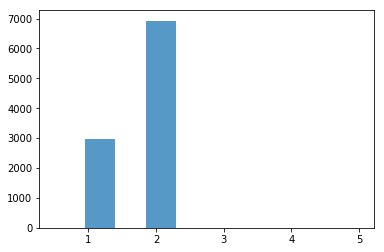

ones:  2970 
twos:  6929 
threes:  1


In [3]:
#plot histogram 
flat = dist.flatten()
plt.hist(flat, bins = 10, range = (0.5,5), alpha =0.75)
plt.show()

print("ones: ", sum(flat ==1), "\ntwos: ", sum (flat == 2), "\nthrees: ", sum(flat ==3))

In [5]:
graph= {
    'A': ['B', 'C'],
    'B': ['A', 'C','D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E', 'F'],
    'E': ['C', 'D'],
    'F': ['D']
}
graph

{'A': ['B', 'C'],
 'B': ['A', 'C', 'D'],
 'C': ['A', 'B', 'D', 'E'],
 'D': ['B', 'C', 'E', 'F'],
 'E': ['C', 'D'],
 'F': ['D']}

In [6]:
#python的列表默认list.pop()是list.pop(-1)，也就是说，python中默认列表是栈

#如果设置list.pop(0)，这个列表就是队列

def BFS(graph, start):
    que = []
    que.append(start)
    seen = set(start)
    parent = {start: None}
    while(len(que) > 0):
        node = que.pop(0)
        for neighbor in graph[node]:
            if neighbor not in seen:
                parent[neighbor] = node
                que.append(neighbor)
                seen.add(neighbor)
    return parent

parent = BFS(graph, 'E')
#打印 parent 字典
for key in parent:
    print(key, parent[key])
    
print('\n')

#给定一个节点，寻找到 E 的最短路径
node = 'B'
while node != None:
    print(node)
    node = parent[node]

E None
C E
D E
A C
B C
F D


B
C
E


In [7]:
#python的列表默认就是栈，也就是说，list.pop()默认就是list.pop(-1)

def DFS(graph, start):
    stack = []
    stack.append(start)
    seen = set(start)
    while(len(stack) > 0):
        node = stack.pop()
        print(node)
        for neighbor in graph[node]:
            if neighbor not in seen:
                stack.append(neighbor)
                seen.add(neighbor)
    return stack

DFS(graph, 'A')

A
C
E
D
F
B


[]

In [8]:
graph= {
    'A': {'B':5, 'C':1},
    'B': {'A':5, 'C':2,'D':1},
    'C': {'A':1, 'B':2, 'D':4, 'E':8},
    'D': {'B':1, 'C':4, 'E':3, 'F':6},
    'E': {'C':8, 'D':3},
    'F': {'D':6}
}
graph

{'A': {'B': 5, 'C': 1},
 'B': {'A': 5, 'C': 2, 'D': 1},
 'C': {'A': 1, 'B': 2, 'D': 4, 'E': 8},
 'D': {'B': 1, 'C': 4, 'E': 3, 'F': 6},
 'E': {'C': 8, 'D': 3},
 'F': {'D': 6}}

In [9]:
# dijkstra算法

import heapq
import math

def init_distance(graph, start):
    distance = {start:0}
    for node in graph:
        if node !=start:
            distance[node] = math.inf
    return distance

def dijkstra(graph, start):
    priQue = []
    heapq.heappush(priQue, (0, start))
    seen = set()
    parent = {start: None}
    distance = init_distance(graph, start)
    while(len(priQue) > 0):
        (dist, node) = heapq.heappop(priQue)
        seen.add(node)
        for neighbor in graph[node].keys():
            if neighbor not in seen:
                if dist + graph[node][neighbor] < distance[neighbor]:
                    heapq.heappush(priQue, (dist + graph[node][neighbor], neighbor))
                    parent[neighbor] = node
                    distance[neighbor] = dist + graph[node][neighbor]
    return parent, distance

parent, distance = dijkstra(graph, 'A')
print(parent)
print(distance)


{'A': None, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'D', 'F': 'D'}
{'A': 0, 'B': 3, 'C': 1, 'D': 4, 'E': 7, 'F': 10}


In [10]:
import sys
import numpy as np

graph = {0: {1:2, 4:4}, #节点0的邻接节点为1和4，节点0与节点1之间边的权重为2，节点0与节点4之间边的权重为4
         1: {2:3},
         2: {3:5, 4:1},
         3: {0:8},
         4: {3:3}}
print(graph)

{0: {1: 2, 4: 4}, 1: {2: 3}, 2: {3: 5, 4: 1}, 3: {0: 8}, 4: {3: 3}}


In [11]:
# Dijkstra algorithm

def allPairsShortestPath(g):
    dist = np.zeros((5, 5))
    pred = np.zeros((5, 5))
    for u in g:
        for v in g:
            dist[u][v] = sys.maxsize
            pred[u][v] = None
        dist[u][u] = 0
        pred[u][u] = None
        
        for v in g[u]:
            dist[u][v] = g[u][v]
            pred[u][v] = u
    for mid in g:
        for u in g:
            for v in g:
                newlen = dist[u][mid] + dist[mid][v]
                if newlen < dist[u][v]:
                    dist[u][v] = newlen
                    pred[u][v] = pred[mid][v]
    return(dist,pred)

def constructShortestPath(s, t, pred):
    path = [t]
    while t != s:
        tmp = pred[s][t]
        t = tmp.astype(int)
        if t is None:
            return None
        path.insert(0, t)
    return path

dist, pred = allPairsShortestPath(graph)
print(dist)
path03 = constructShortestPath(0, 3, pred)
print(path03)

[[ 0.  2.  5.  7.  4.]
 [15.  0.  3.  7.  4.]
 [12. 14.  0.  4.  1.]
 [ 8. 10. 13.  0. 12.]
 [11. 13. 16.  3.  0.]]
[0, 4, 3]


## 小明找工作的例子

In [14]:
# dynamic programming solution of example 4.2
import time
start = time.perf_counter() #start用于记录程序开始运行的时间
v = {1:5, 2:1, 3:7, 4:5, 5:3, 6:8, 7:2, 8:4}
pastJob = {1:0, 2:0, 3:0, 4:1, 5:3, 6:1, 7:4, 8:6}

maxVMemo = {0:0, 1:5}
def maxV(n):
    if n in maxVMemo:
        return maxVMemo[n]
    else:
        for i in range(2,n+1,1):
            choose = v[i] + maxVMemo[pastJob[i]]
            not_choose = maxVMemo[i-1]
            maxVMemo[i] = max(choose, not_choose)
        return maxVMemo[n]
    
print(f'maxV({len(pastJob)})={maxV(len(pastJob))}')
print(f'maxVMemo={maxVMemo}')
end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

maxV(8)=17
maxVMemo={0: 0, 1: 5, 2: 5, 3: 7, 4: 10, 5: 10, 6: 13, 7: 13, 8: 17}
t=0.0004280760000057171


In [15]:
# recursion algorithm with memoization
import time
start = time.perf_counter() #start用于记录程序开始运行的时间
v = {1:5, 2:1, 3:7, 4:5, 5:3, 6:8, 7:2, 8:4}
pastJob = {1:0, 2:0, 3:0, 4:1, 5:3, 6:1, 7:4, 8:6}

maxVMemo = {0:0, 1:5}
def maxV(n):
    if n in maxVMemo:
        return maxVMemo[n]
    else:
        choose = v[n] + maxV(pastJob[n])
        not_choose = maxV(n-1)
        maxVMemo[n] = max(choose, not_choose)
    return maxVMemo[n]
    
print(f'maxV({len(pastJob)})={maxV(len(pastJob))}')
print(f'maxVMemo={maxVMemo}')
end = time.perf_counter() #end用于记录程序结束运行的时间
print(f't={end-start}')

maxV(8)=17
maxVMemo={0: 0, 1: 5, 2: 5, 3: 7, 4: 10, 5: 10, 6: 13, 7: 13, 8: 17}
t=0.0006332359999987602
